# Regresión con el algoritmo de los vecimos 

## k-Nearest Neighbors

El algoritmo `k-NN` es posiblemente el algoritmo de aprendizaje automático más simple.

La construcción del modelo consiste solo en almacenar el conjunto de datos de entrenamiento.

Para hacer una predicción de un nuevo punto de datos, el algoritmo busca los puntos de datos más cercanos en el conjunto de datos de entrenamiento: sus "vecinos más cercanos".

## k-neighbors regression

También hay una variante de regresión del algoritmo de los k vecinos más cercanos.

* comencemos por usar el único vecino más cercano,
* usemos el conjunto de datos `wave`.

Agregamos tres puntos de datos de prueba como estrellas verdes en el eje x.

* La predicción que utiliza un solo vecino es solo el valor objetivo del vecino más cercano. 
* Estos se muestran como estrellas azules en la Figura:

In [ ]:

import mglearn 
mglearn.plots.plot_knn_regression(n_neighbors = 1)

Podemos usar más que el único vecino más cercano para la regresión.

Cuando se utilizan varios vecinos más cercanos, la predicción es el promedio, o la media, de los vecinos relevantes:

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

* El algoritmo de k - vecinos más cercanos para la regresión se implementa en la clase 
  `KNeighborsRegressor` en scikit-learn. 
* Se usa de manera similar a `KNeighborsClassifier`:

In [ ]:
import mglearn 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

Ahora podemos hacer predicciones en el conjunto de prueba:

In [ ]:
print("Test set predictions \n {}".format(reg.predict(X_test)))

También podemos evaluar el modelo utilizando el método de puntuación (`.score()`), que para los regresores devuelve la puntuación R2.

La puntuación R2, también conocida como coeficiente de determinación, es una medida de bondad de una predicción para un modelo de regresión y produce una puntuación entre 0 y 1.

Un valor de 1 corresponde a una predicción perfecta, y un valor de 0 corresponde a un modelo constante que solo predice la media de las respuestas del conjunto de entrenamiento, `y_train`:

In [ ]:
print("Test set R2: {:.2f}".format(reg.score(X_test,y_test))) 

Aquí, la puntuación es 0,83, lo que indica un ajuste de modelo relativamente bueno.

## Analyzing KNeighborsRegressor

## Analizando KNeighborsRegressor

Para nuestro conjunto de datos unidimensionales, podemos ver cómo se ven las predicciones para todos los valores de características posibles.

Para hacer esto, creamos un conjunto de datos de prueba que consta de muchos puntos en la línea:

## Comparación de predicciones hechas por regresión de vecinos más cercanos para diferentes valores de n_neighbors

Tomaremos el dataset `wave` de `mglearn`
* Este dataset tiene una sola característica y una variable objetivo $y$ 

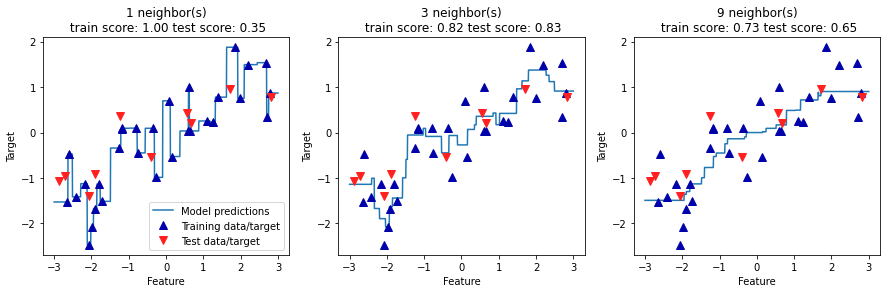

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import mglearn
X,y = mglearn.datasets.make_wave(n_samples=40)
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state= 0 )
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # un arreglo 2D de 1000 por 1
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")


Como podemos ver en la gráfica, usando un solo vecino, cada punto en el conjunto de entrenamiento tiene una influencia obvia en las predicciones, y los valores predichos pasan por todos los puntos de datos.

Esto conduce a una predicción muy inestable.

Tener en cuenta más vecinos conduce a predicciones más fluidas, pero estas tampoco se ajustan a los datos de entrenamiento.

### Fortalezas, debilidades y parámetros

En principio, hay dos parámetros importantes para el `KNeighborsClassifier`: 
* el número de vecinos y 
* cómo mide la distancia entre puntos de datos.

En la práctica, el uso de una pequeña cantidad de vecinos, como tres o cinco, suele funcionar bien, pero sin duda debería ajustar este parámetro.

Dice, Muller que La elección de la medida de distancia correcta está un poco más allá del alcance de su libro.

De forma predeterminada, se utiliza la distancia euclidiana, que funciona bien en muchos entornos.

Uno de los puntos fuertes de k-NN es que el modelo es muy fácil de entender y, a menudo, ofrece un rendimiento razonable sin muchos ajustes.

El uso de este algoritmo es un buen método de referencia para probar antes de considerar técnicas más avanzadas.

La construcción del modelo de vecinos más cercanos suele ser muy rápida, pero cuando su conjunto de entrenamiento es muy grande (ya sea en número de características o en número de muestras) la predicción puede ser lenta.

Al utilizar el algoritmo `k-NN`, es importante preprocesar sus datos (consulte el Capítulo 3 de Muller).

Este enfoque a menudo no funciona bien en   
* conjuntos de datos con muchas características (cientos o más), y 
* lo hace particularmente mal con conjuntos de datos donde la mayoría de las características son 0 
  la mayor parte del tiempo (los denominados conjuntos de datos dispersos).

Entonces, aunque el algoritmo de k-vecinos más cercano es fácil de entender, no se usa a menudo en la práctica, debido a que la predicción es lenta y su incapacidad para manejar muchas características.

# Modelos lineales 

El método de los modelos lineales no tiene ninguno de estos inconvenientes del método de los K - vecimos más cercanos.